In [16]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [17]:
plt.rcParams['figure.figsize'] = (4,3)

In [18]:
data = sns.load_dataset('penguins')

# Gridlines and reference lines 

## Custom gridlines 

We will use `ax.grid`

Gridlines can be customized on both axis separately, the same for major and minor ticks

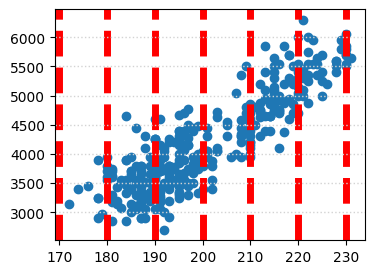

In [19]:
f, ax = plt.subplots()

ax.grid(axis="x", color="red", linestyle="--", linewidth=5)
ax.grid(axis="y", color="lightgray", linestyle=":", linewidth=1)

ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g'], );


Notice what overlaps what 

To move them to the background - use `zorder` to bring the scatter to the foreground. 

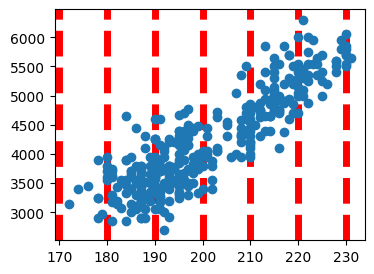

In [20]:
f, ax = plt.subplots()
ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g'], 
           zorder=99);
ax.grid(axis="x", color="red", linestyle="--", linewidth=5)

Having white grid on the top is sometimes useful for a bar chart visualization

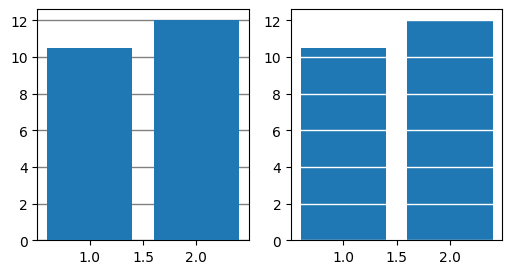

In [21]:
f, ax = plt.subplots(figsize=(6,3), ncols=2)

ax[0].bar(x=[1,2], height=[10.5,12], zorder=99);
ax[0].grid(axis="y", color="gray", linewidth=1)

ax[1].bar(x=[1,2], height=[10.5,12]);
ax[1].grid(axis="y", color="white", linewidth=1)

## Drawing arbitrary lines 

#### horizontal and vertical lines 

`ax.axhline` and `axvline` will draw one line across the whole chart area at a data coordinate 

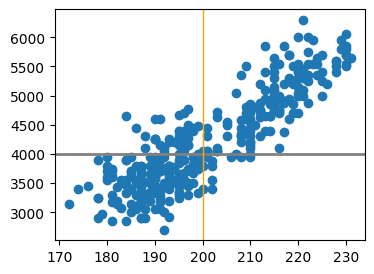

In [22]:
f, ax = plt.subplots()
ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']);
ax.axhline(4000, color='gray', linewidth=2)
ax.axvline(200, color='orange', linewidth=1)

#### diagonal lines

Option 1: Plot a diagonal line using `ax.plot`

(2520.0, 6480.0)

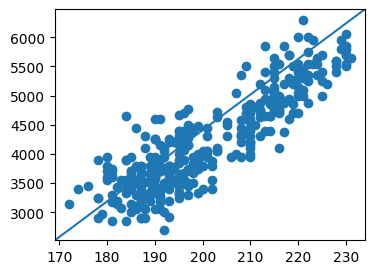

In [31]:
f, ax = plt.subplots()
ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']);

# get the limits
xlims = ax.get_xlim()
ylims = ax.get_ylim()

# # # plot the line - this will re-compute the limits
ax.plot(xlims, ylims, )

# # bring back the limits to initial values
ax.set_xlim(xlims)
ax.set_ylim(ylims)

Alternative: draw a line using axes coordinates

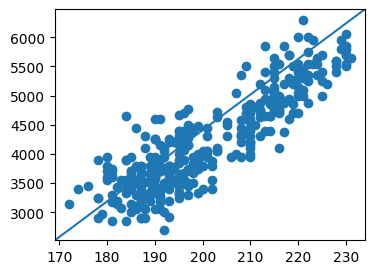

In [24]:
f, ax = plt.subplots()
ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']);

# ax.transAxes makes the ax.plot use normalized axes coordinates, and not data coordinates
ax.plot([0, 1], [0, 1], transform=ax.transAxes) # diagonal line

___

# Annotating regions

### Rectangular areas across the axes

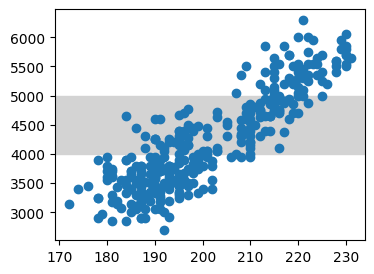

In [25]:
f, ax = plt.subplots()
b = ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']); 
# default zorder is 1 -> check using b.get_zorder()

ax.axhspan(4000, 5000, color="lightgray", zorder=0) # data coordinates 

The rectangle can be shrinked: 

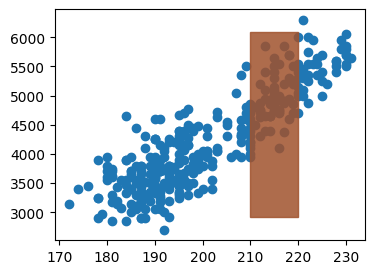

In [26]:
f, ax = plt.subplots()
ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']); 

ax.axvspan(210, 220, ymin=0.1, ymax=0.9, color="sienna", zorder=9, alpha=0.85) # defaults in mixed coordinates... annoying 

### Arbitrary rectangles and polygons 

#### Rectangle

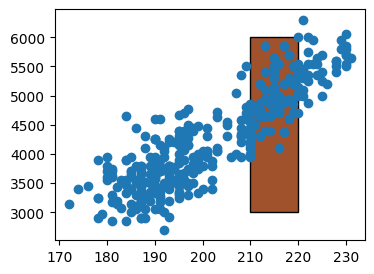

In [27]:
from matplotlib.patches import Rectangle 

f, ax = plt.subplots()
ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']); 

# add a rectangle: 

# step 1: define the rectangle 
ar = Rectangle(xy=(210,3000), width=10, height=3000, # data coordinates by default
               facecolor="sienna", zorder=0, 
               linewidth=1, edgecolor='k')

# step 2: add the rectangle to our chart object 
ax.add_patch(ar)

In [28]:
ax.get_children()

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

#### Polygon 

You can also use the same workflow to draw rectangles or other polygons on top of images

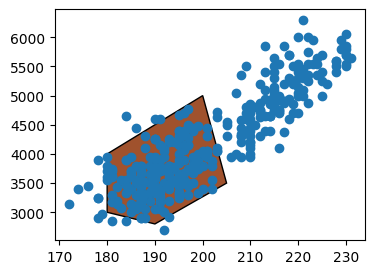

In [29]:
from matplotlib.patches import Polygon 

f, ax = plt.subplots()
ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']); 

path = [ (180, 4000), (200, 5000), (205, 3500), (190,2800), (180,3000)]

ar = Polygon(xy=path, 
               facecolor="sienna", zorder=0, 
               linewidth=1, edgecolor='k')
ax.add_patch(ar)